Required Libraries

In [1]:
! pip install opencv

DEPRECATION: Loading egg at /opt/anaconda3/envs/rishabh_sat/lib/python3.12/site-packages/ISR-2.2.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [ ]:
! pip intall

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read CSV file

In [3]:
df = pd.read_csv('/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/Compliance-app/Delhi Brick Kiln - Sheet1 (2).csv')
df

,Unnamed: 0,Type,Lat,Lon,Year Made,Oval FCB to ZigZag,Circular FCB to Zigzag,circular FCB to Oval FCB,ZigZag to FCB,Year Demolished
0,0,1,28.72475,76.92424,2012.0,2021.0,NaN,NaN,NaN,NaN
1,1,1,28.92309,77.29121,2009.0,2019.0,NaN,NaN,NaN,NaN
2,2,1,28.30281,77.35802,2010.0,2019.0,NaN,NaN,NaN,NaN
3,3,1,28.20369,77.44003,2011.0,2019.0,NaN,NaN,NaN,NaN
4,4,1,28.41146,77.61957,2009.0,2018.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
791,791,1,28.99912,77.44388,2009.0,2018.0,NaN,NaN,NaN,NaN
792,792,1,28.23366,77.41032,2015.0,2018.0,NaN,NaN,NaN,NaN
793,793,1,28.22596,77.41453,2018.0,NaN,NaN,NaN,NaN,NaN
794,794,1,28.74257,77.43613,2010.0,2017.0,NaN,NaN,NaN,NaN


Take only required columns from csv

In [22]:
df1 = df.reindex(columns = ['Type','Year Made', 'Oval FCB to ZigZag', 'Circular FCB to Zigzag','circular FCB to Oval FCB', 'ZigZag to FCB', 'Year Demolished'])
df1 = df1.fillna(0).astype(int)
df1 = df1[df1['Year Made'] > 0]
df1.to_csv('Delhi_Brick_Kiln_final.csv', index = True)

In [21]:
df1 

,Type,Year Made,Oval FCB to ZigZag,Circular FCB to Zigzag,circular FCB to Oval FCB,ZigZag to FCB,Year Demolished
0,1,2012,2021,0,0,0,0
1,1,2009,2019,0,0,0,0
2,1,2010,2019,0,0,0,0
3,1,2011,2019,0,0,0,0
4,1,2009,2018,0,0,0,0
...,...,...,...,...,...,...,...
791,1,2009,2018,0,0,0,0
792,1,2015,2018,0,0,0,0
793,1,2018,0,0,0,0,0
794,1,2010,2017,0,0,0,0


Years (on x-axis) and Helper function (to create df with continuous year data)

In [5]:
years = pd.Series(range(df1['Year Made'].min(), df1['Year Made'].max() + 1))

def process(years, par_df, col, name, cum_name):
    new_df = par_df.groupby(col).size().reset_index(name=name)
    new_df.set_index(col, inplace=True)

    new_df = new_df.reindex(years, fill_value=0).reset_index()
    new_df.columns = ['Year', name]

    new_df[cum_name] = new_df[name].cumsum()
    return new_df

## 1. Total Brick kilns over years

In [6]:
total_kilns = process(years, df1, 'Year Made', 'Kilns Created', 'Kilns Present')
total_kilns

,Year,Kilns Created,Kilns Present
0,2009,184,184
1,2010,313,497
2,2011,147,644
3,2012,52,696
4,2013,18,714
5,2014,32,746
6,2015,19,765
7,2016,0,765
8,2017,5,770
9,2018,8,778


## 2. Zigzag kilns over years  
zigzag kilns in a year = kilns which remained as zigzag till that year (a) + oval kilns which converted to zigzag that year (b) + circular kilns which converted to zigzag in that year (c) - zigzag kilns which converted to FCB that year (d)

a. kilns which remained as zigzag till that year

In [7]:
ori_ZZ = df1[
    (df1['Oval FCB to ZigZag'] == 0) &
    (df1['Circular FCB to Zigzag'] == 0) &
    (df1['circular FCB to Oval FCB'] == 0) &
    (df1['ZigZag to FCB'] == 0) &
    (df1['Year Demolished'] == 0) &
    (df1['Type'] == 1)
]

ori_ZZ

,Type,Year Made,Oval FCB to ZigZag,Circular FCB to Zigzag,circular FCB to Oval FCB,ZigZag to FCB,Year Demolished
85,1,2019,0,0,0,0,0
139,1,2015,0,0,0,0,0
191,1,2021,0,0,0,0,0
200,1,2019,0,0,0,0,0
242,1,2019,0,0,0,0,0
282,1,2018,0,0,0,0,0
283,1,2018,0,0,0,0,0
362,1,2018,0,0,0,0,0
363,1,2019,0,0,0,0,0
364,1,2019,0,0,0,0,0


In [8]:
ori_zz = process(years, ori_ZZ, 'Year Made', 'Original Zigzag', 'Total Original Zigzag')
ori_zz

,Year,Original Zigzag,Total Original Zigzag
0,2009,0,0
1,2010,0,0
2,2011,0,0
3,2012,0,0
4,2013,1,1
5,2014,0,1
6,2015,2,3
7,2016,0,3
8,2017,3,6
9,2018,6,12


b. oval kilns which converted to zigzag that year

In [9]:
OFCB_counts = process(years, df1, 'Oval FCB to ZigZag', 'Oval FCB Converted', 'Total Oval FCB Converted')
OFCB_counts

,Year,Oval FCB Converted,Total Oval FCB Converted
0,2009,0,0
1,2010,1,1
2,2011,0,1
3,2012,0,1
4,2013,0,1
5,2014,0,1
6,2015,16,17
7,2016,14,31
8,2017,108,139
9,2018,220,359


c. circular kilns which converted to zigzag that year

In [10]:
CFCB_counts = process(years, df1, 'Circular FCB to Zigzag', 'Circular FCB Converted', 'Total Circular FCB Converted')
CFCB_counts

,Year,Circular FCB Converted,Total Circular FCB Converted
0,2009,0,0
1,2010,0,0
2,2011,0,0
3,2012,0,0
4,2013,0,0
5,2014,0,0
6,2015,3,3
7,2016,1,4
8,2017,1,5
9,2018,1,6


d.zigzag kilns which converted to FCB that yea

In [11]:
con_zz = process(years, df1, 'ZigZag to FCB', 'Converted to FCB', 'Total Converted to FCB')
con_zz

,Year,Converted to FCB,Total Converted to FCB
0,2009,0,0
1,2010,0,0
2,2011,0,0
3,2012,0,0
4,2013,0,0
5,2014,0,0
6,2015,0,0
7,2016,0,0
8,2017,0,0
9,2018,0,0


from above a, b, c and d we get the total number of zigzag kilns present in the current year as follows

In [12]:
total_ZZ = ori_zz['Total Original Zigzag']  + OFCB_counts['Total Oval FCB Converted'] +  CFCB_counts['Total Circular FCB Converted'] - con_zz['Total Converted to FCB']
total_ZZ

0       0
1       1
2       1
3       1
4       2
5       2
6      23
7      38
8     150
9     377
10    643
11    716
12    754
dtype: int64

## 3. FCB kilns over years  
FCB kilns in a year = kilns which remained as FCB till that year (a) + zigzag kilns which converted to FCB that year (b) - oval FCB kilns which converted to Zigzag that year (c) - circular FCB kilns which converted to Zigzag that year (d)

a. kilns which remained FCB till that year

In [13]:
mask = df1.isin(ori_ZZ.to_dict(orient='list')).all(axis=1)
ori_FCB = df1[~mask]
ori_FCB

,Type,Year Made,Oval FCB to ZigZag,Circular FCB to Zigzag,circular FCB to Oval FCB,ZigZag to FCB,Year Demolished
0,1,2012,2021,0,0,0,0
1,1,2009,2019,0,0,0,0
2,1,2010,2019,0,0,0,0
3,1,2011,2019,0,0,0,0
4,1,2009,2018,0,0,0,0
...,...,...,...,...,...,...,...
790,1,2009,2018,0,0,0,0
791,1,2009,2018,0,0,0,0
792,1,2015,2018,0,0,0,0
794,1,2010,2017,0,0,0,0


In [14]:
ori_fcb = process(years, ori_FCB, 'Year Made', 'Original FCB', 'Total Original FCB')
ori_fcb

,Year,Original FCB,Total Original FCB
0,2009,184,184
1,2010,313,497
2,2011,147,644
3,2012,52,696
4,2013,17,713
5,2014,32,745
6,2015,17,762
7,2016,0,762
8,2017,2,764
9,2018,2,766


b. zigzag kilns which converted to FCB that year

In [15]:
con_zz

,Year,Converted to FCB,Total Converted to FCB
0,2009,0,0
1,2010,0,0
2,2011,0,0
3,2012,0,0
4,2013,0,0
5,2014,0,0
6,2015,0,0
7,2016,0,0
8,2017,0,0
9,2018,0,0


c. Oval FCB kilns which converted to zigzag that year

In [16]:
OFCB_counts

,Year,Oval FCB Converted,Total Oval FCB Converted
0,2009,0,0
1,2010,1,1
2,2011,0,1
3,2012,0,1
4,2013,0,1
5,2014,0,1
6,2015,16,17
7,2016,14,31
8,2017,108,139
9,2018,220,359


d. circular FCB which got converted to Zigzag that year

In [17]:
CFCB_counts

,Year,Circular FCB Converted,Total Circular FCB Converted
0,2009,0,0
1,2010,0,0
2,2011,0,0
3,2012,0,0
4,2013,0,0
5,2014,0,0
6,2015,3,3
7,2016,1,4
8,2017,1,5
9,2018,1,6


from above a, b, c and d we get the total number of FCB present in the current year as follows

In [18]:
total_FCB = ori_fcb['Total Original FCB']  + con_zz['Total Converted to FCB'] - OFCB_counts['Total Oval FCB Converted'] - CFCB_counts['Total Circular FCB Converted']
total_FCB

0     184
1     496
2     643
3     695
4     712
5     744
6     742
7     727
8     620
9     401
10    146
11     74
12     37
dtype: int64

### Plotting all 3 graphs  
1. Total kilns over years  
2. Total Zigzag kilns over years  
3. Total FCB kilns over years

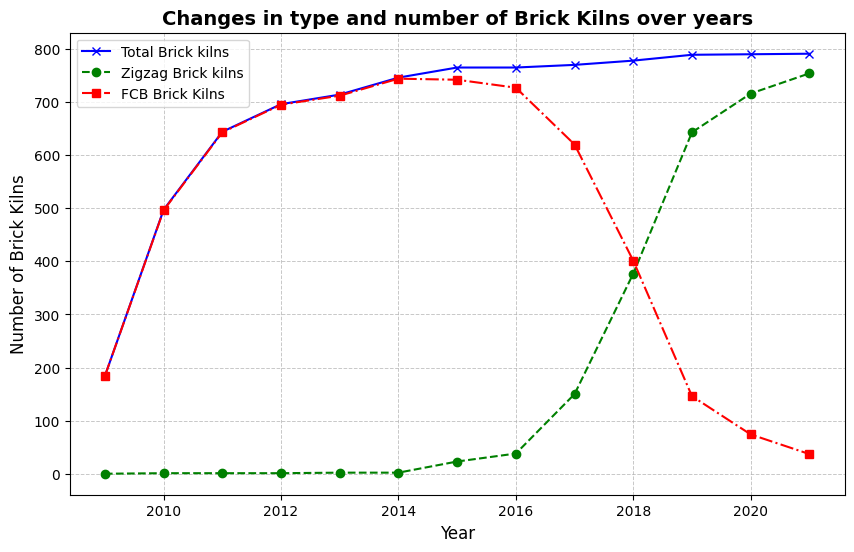

In [19]:
plt.figure(figsize=(10, 6))  

plt.plot(years, total_kilns['Kilns Present'], marker='x', linestyle='-', color='b', label='Total Brick kilns')
plt.plot(years, total_ZZ, marker='o', linestyle='--', color='g', label='Zigzag Brick kilns')
plt.plot(years, total_FCB, marker='s', linestyle='-.', color='r', label='FCB Brick Kilns')

plt.xlabel('Year', fontsize=12)  # Font size for x-axis label
plt.ylabel('Number of Brick Kilns', fontsize=12)  # Font size for y-axis label
plt.title('Changes in type and number of Brick Kilns over years', fontsize=14, fontweight='bold')  # Title with larger font and bold

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

plt.legend(loc='upper left', fontsize=10)  
plt.show()
